In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
data = pd.read_csv('Wind turbines.csv', encoding='unicode_escape')
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [ ]:
data.shape

(50530, 5)

In [ ]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776282,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [ ]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

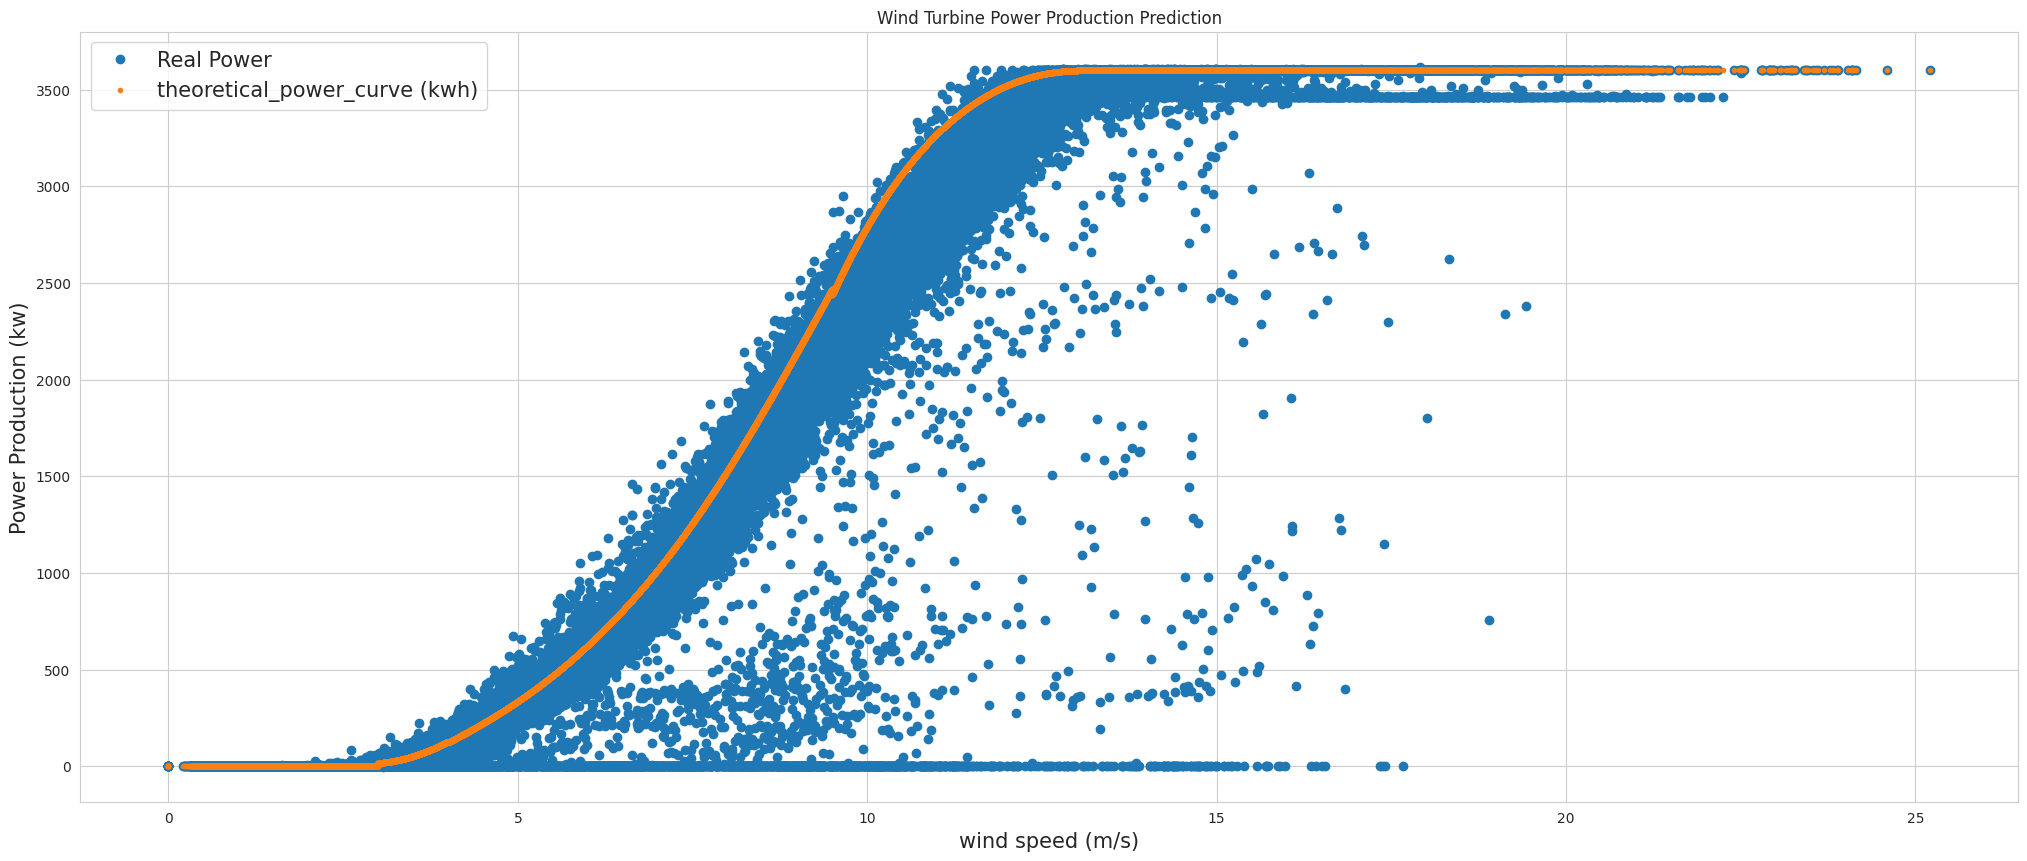

In [ ]:
data = data
exp = data['LV ActivePower (kW)']
the = data['Theoretical_Power_Curve (KWh)']
plt.figure(figsize=(25,10))
plt.plot(data['Wind Speed (m/s)'], data['LV ActivePower (kW)'], 'o', label='Real Power')
plt.plot(data['Wind Speed (m/s)'], data['Theoretical_Power_Curve (KWh)'], '.', label='theoretical_power_curve (kwh)')
plt.xlabel('wind speed (m/s)', size=15)
plt.ylabel('Power Production (kw)', size=15)
plt.title('Wind Turbine Power Production Prediction')
plt.legend(fontsize=15)
plt.show()

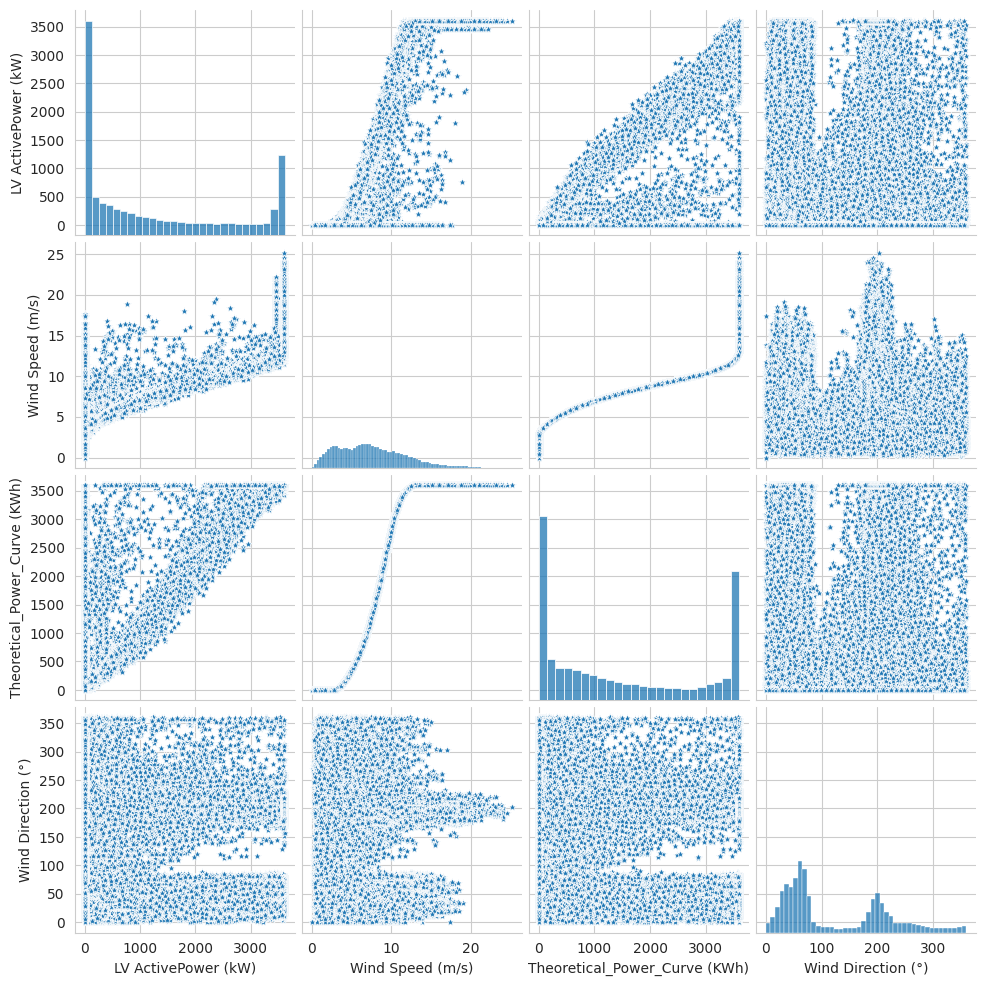

In [ ]:
import seaborn as sns
sns.pairplot(data, markers='*')

In [ ]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
import xgboost as xgb


In [ ]:
def outlier_remover(dat, prop, min, max):
    d = dat
    q_low = d[prop].quantile(min)
    q_hi  = d[prop].quantile(max)
    return d[(d[prop] < q_hi) & (d[prop] > q_low)]

In [ ]:
# Create Sub-DataFrames
d = {}
step = 50
i = 1
for x in range(20, 3400, step):
    d[i] = data.iloc[((data['LV ActivePower (kW)']>=x)&((data['LV ActivePower (kW)']<x+step))).values]
    #print(d[i])
    i = i + 1
print("There are in total of {} DataFrames".format(i-1))

There are in total of 68 DataFrames


In [ ]:
d[69] = data.iloc[(data['LV ActivePower (kW)']>=3300).values]

In [ ]:
# Remove outlier
for x in range(1, 70):
    if x <= 3:
        F = 0.95
    elif ((x > 3) and (x <= 10)):
        F = 0.9
    elif ((x > 10) and (x <= 20)):
        F = 0.92
    elif ((x > 20) and (x < 30)):
        F = 0.96
    else:
        F = 0.985
    d[x] = outlier_remover(d[x], 'Wind Speed (m/s)', 0.0001, F)

In [ ]:
df=pd.DataFrame()
for infile in range(1,70):
    data = d[infile]
    df=df.append(data,ignore_index=True)

In [ ]:
df.shape

(37803, 5)

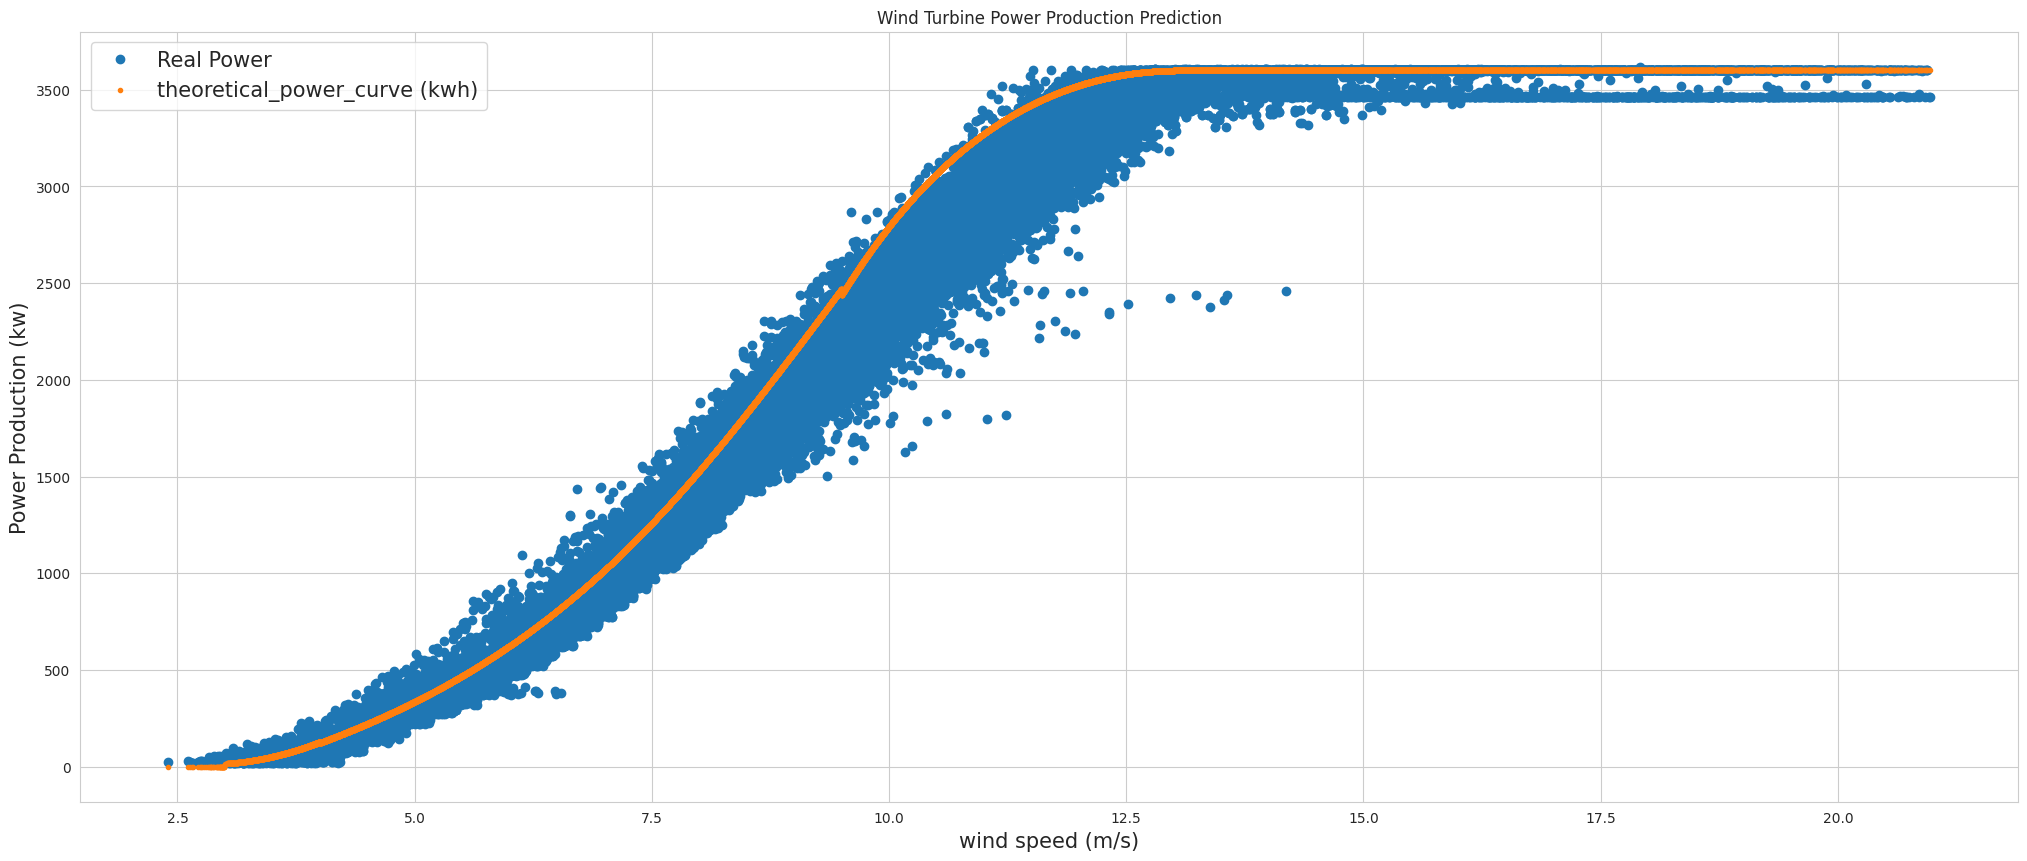

In [ ]:
data = df
exp = data['LV ActivePower (kW)']
the = data['Theoretical_Power_Curve (KWh)']
plt.figure(figsize=(25,10))
plt.plot(data['Wind Speed (m/s)'], data['LV ActivePower (kW)'], 'o', label='Real Power')
plt.plot(data['Wind Speed (m/s)'], data['Theoretical_Power_Curve (KWh)'], '.', label='theoretical_power_curve (kwh)')
plt.xlabel('wind speed (m/s)', size=15)
plt.ylabel('Power Production (kw)', size=15)
plt.title('Wind Turbine Power Production Prediction')
plt.legend(fontsize=15)
plt.show()

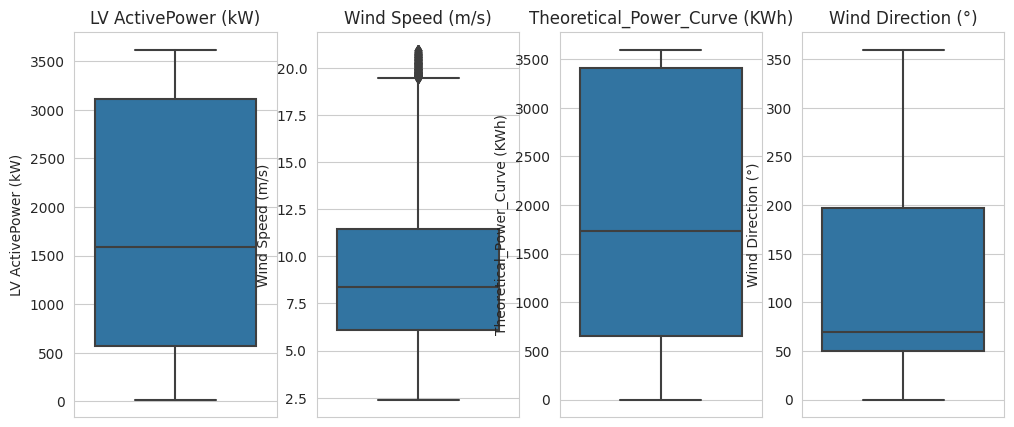

In [ ]:
import matplotlib.pyplot as plt
columns = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']
i=1
plt.figure(figsize=(12,5))
for each in columns:
    plt.subplot(1,4,i)
    sns.boxplot(data = df, y= each)
    plt.title(each)
    i += 1

In [ ]:
ftrain = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)']

def Definedata():
    # define dataset
    data2 = df[ftrain]
    X = data2.drop(columns=['LV ActivePower (kW)']).values
    y = data2['LV ActivePower (kW)'].values
    #lab_enc = preprocessing.LabelEncoder()
    #y = lab_enc.fit_transform(y0)
    return X, y

In [ ]:
def Models(models):

    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)

    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

def Graph_prediction(y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    TP = df['Theoretical_Power_Curve (KWh)']
    number = len(df['Wind Speed (m/s)'])
    aa=[x for x in df['Wind Speed (m/s)']]
    plt.figure(figsize=(25,10))
    plt.plot(aa, y[:number], 'o', label='Real Power')
    plt.plot(aa, y_total[:number], 'x', label='Predicted Power')
    plt.plot(aa, TP[:number], '.', label='theoretical_power_curve (kwh)')

    plt.xlabel('wind speed (m/s)', size=15)
    plt.ylabel('Power Production (kw)', size=15)
    plt.title('Wind Turbine Power Production Prediction')
    plt.legend(fontsize=15)
    plt.show()

		Error Table
Mean Absolute Error      :  86.20194818452488
Mean Squared  Error      :  16287.624254251496
Root Mean Squared  Error :  127.6229769839722
Accuracy on Traing set   :  0.9937399430255588
Accuracy on Testing set  :  0.9896820050176429


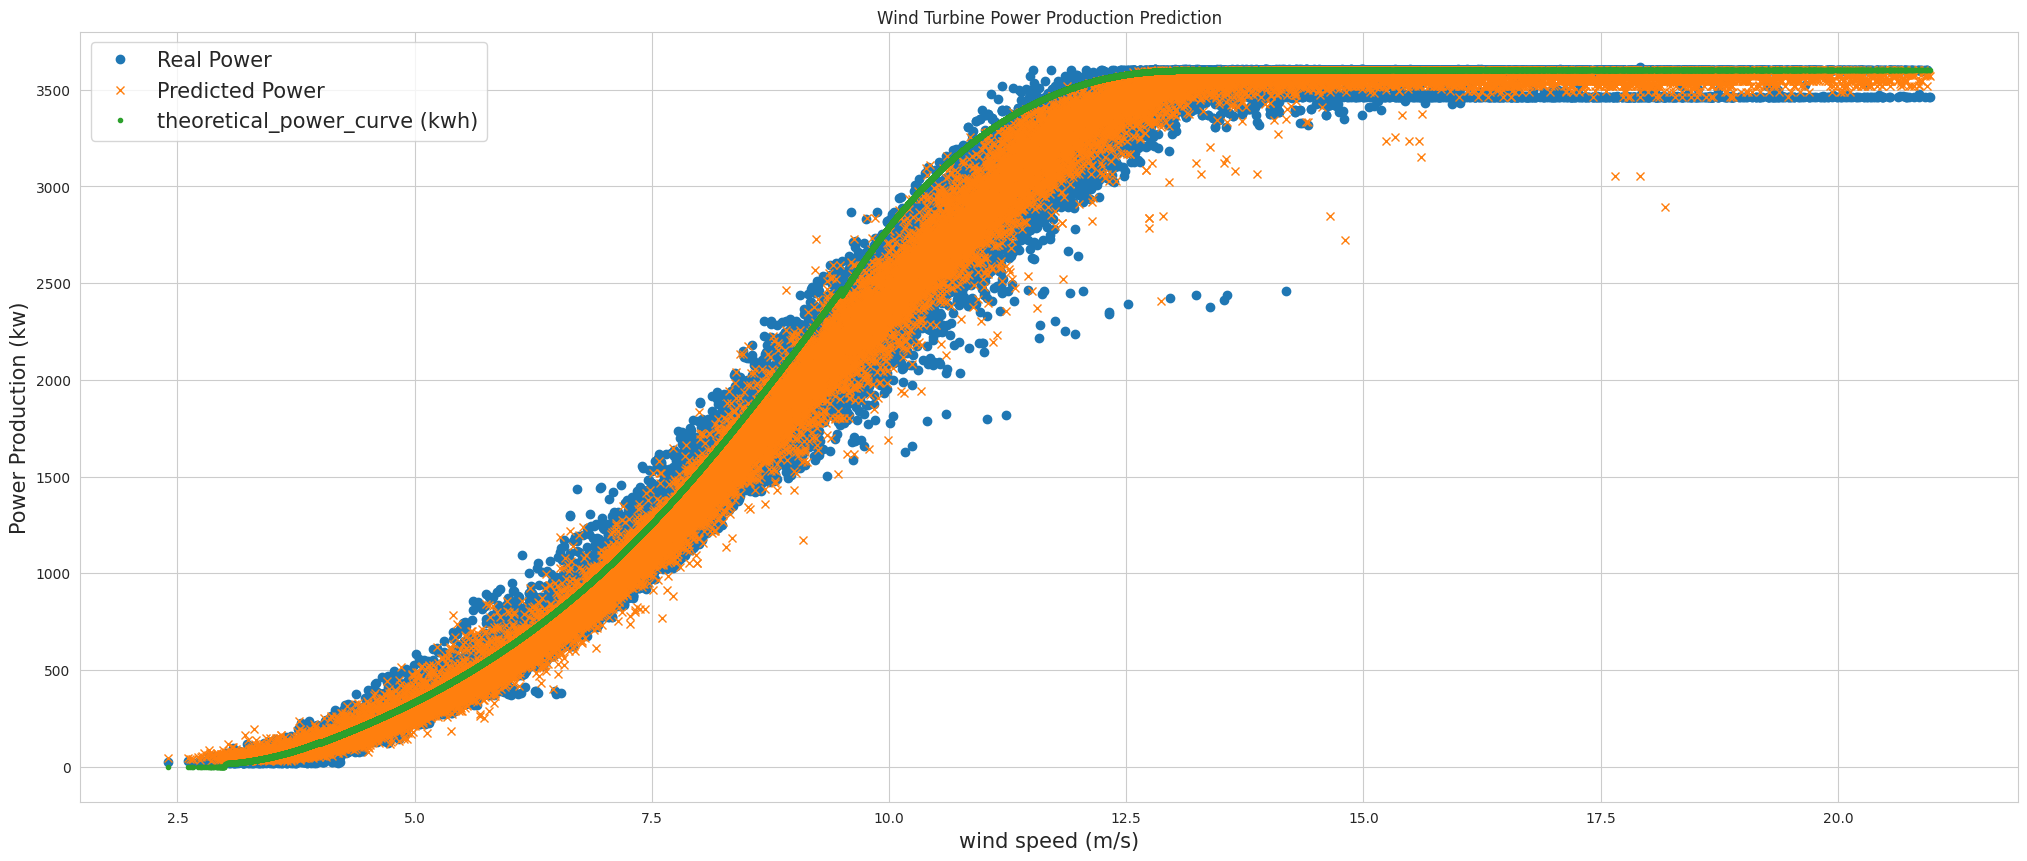

In [ ]:
y_predicted, y_actual = Models(KNeighborsRegressor())
Graph_prediction(y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  98.06847269626293
Mean Squared  Error      :  22814.91638297521
Root Mean Squared  Error :  151.04607370923353
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9855470516087705


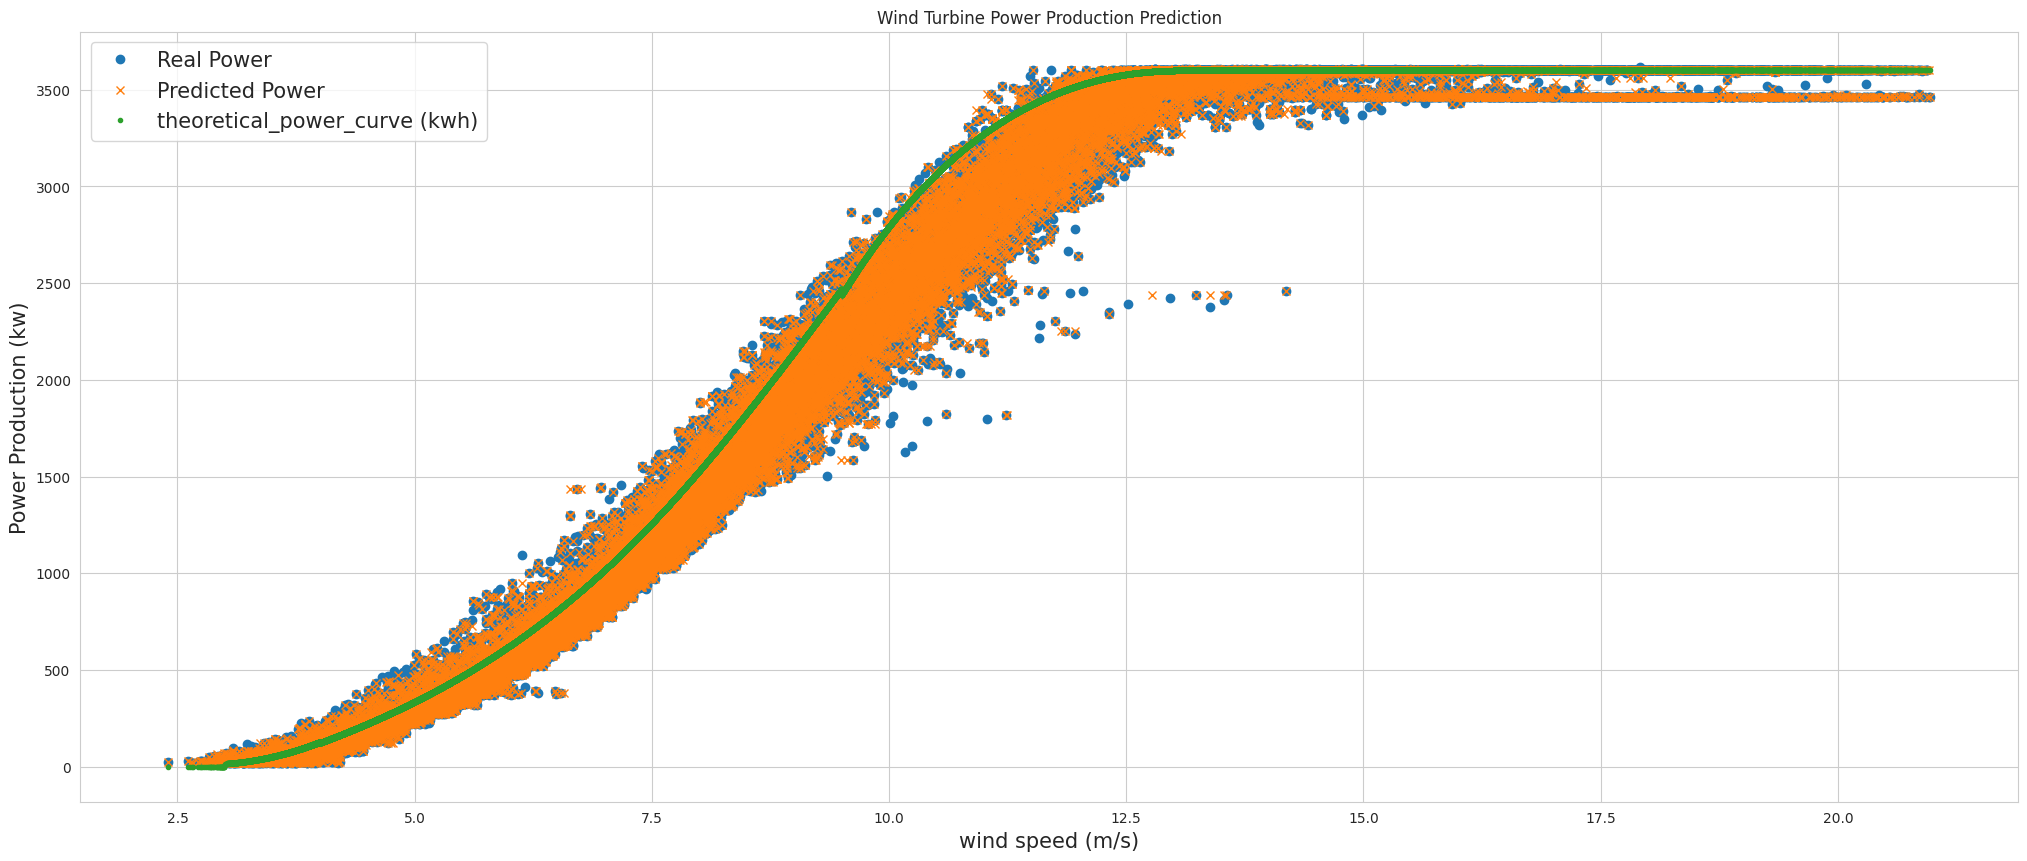

In [ ]:
y_predicted, y_actual = Models(DecisionTreeRegressor())
Graph_prediction(y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  79.88160439789985
Mean Squared  Error      :  14851.483902973865
Root Mean Squared  Error :  121.86666444509699
Accuracy on Traing set   :  0.9999999999999949
Accuracy on Testing set  :  0.9905917809743529


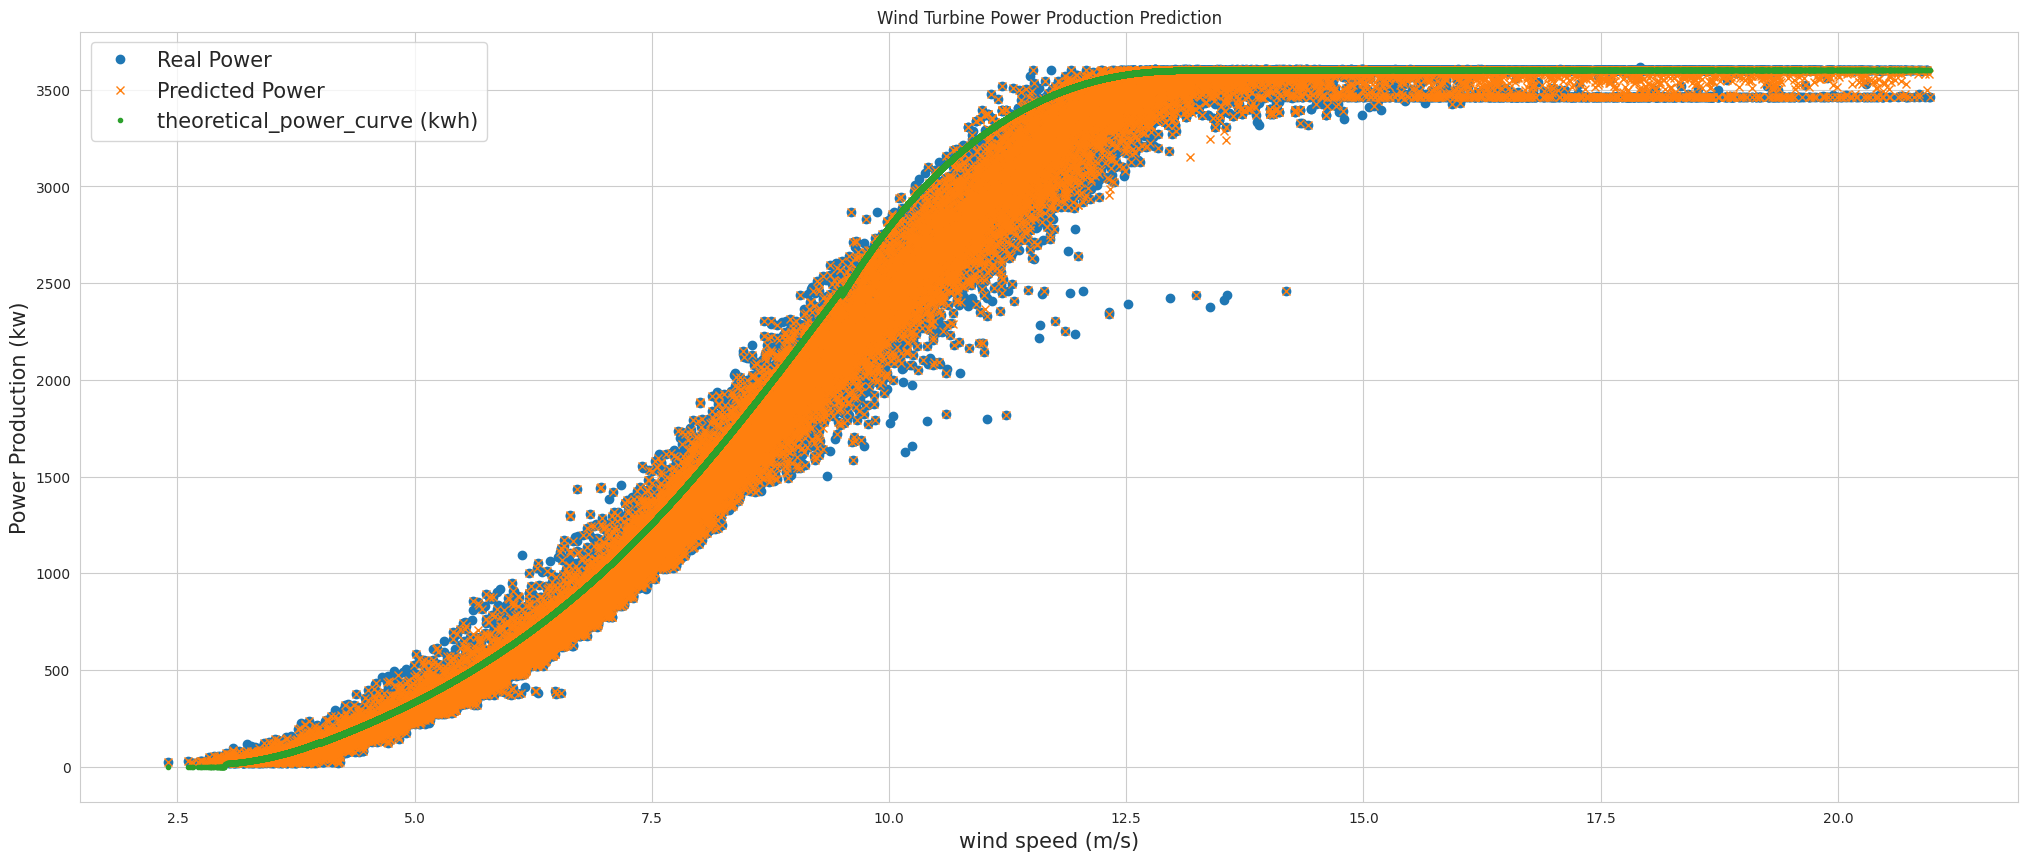

In [ ]:
y_predicted, y_actual = Models(ExtraTreesRegressor())
Graph_prediction(y_actual, y_predicted)

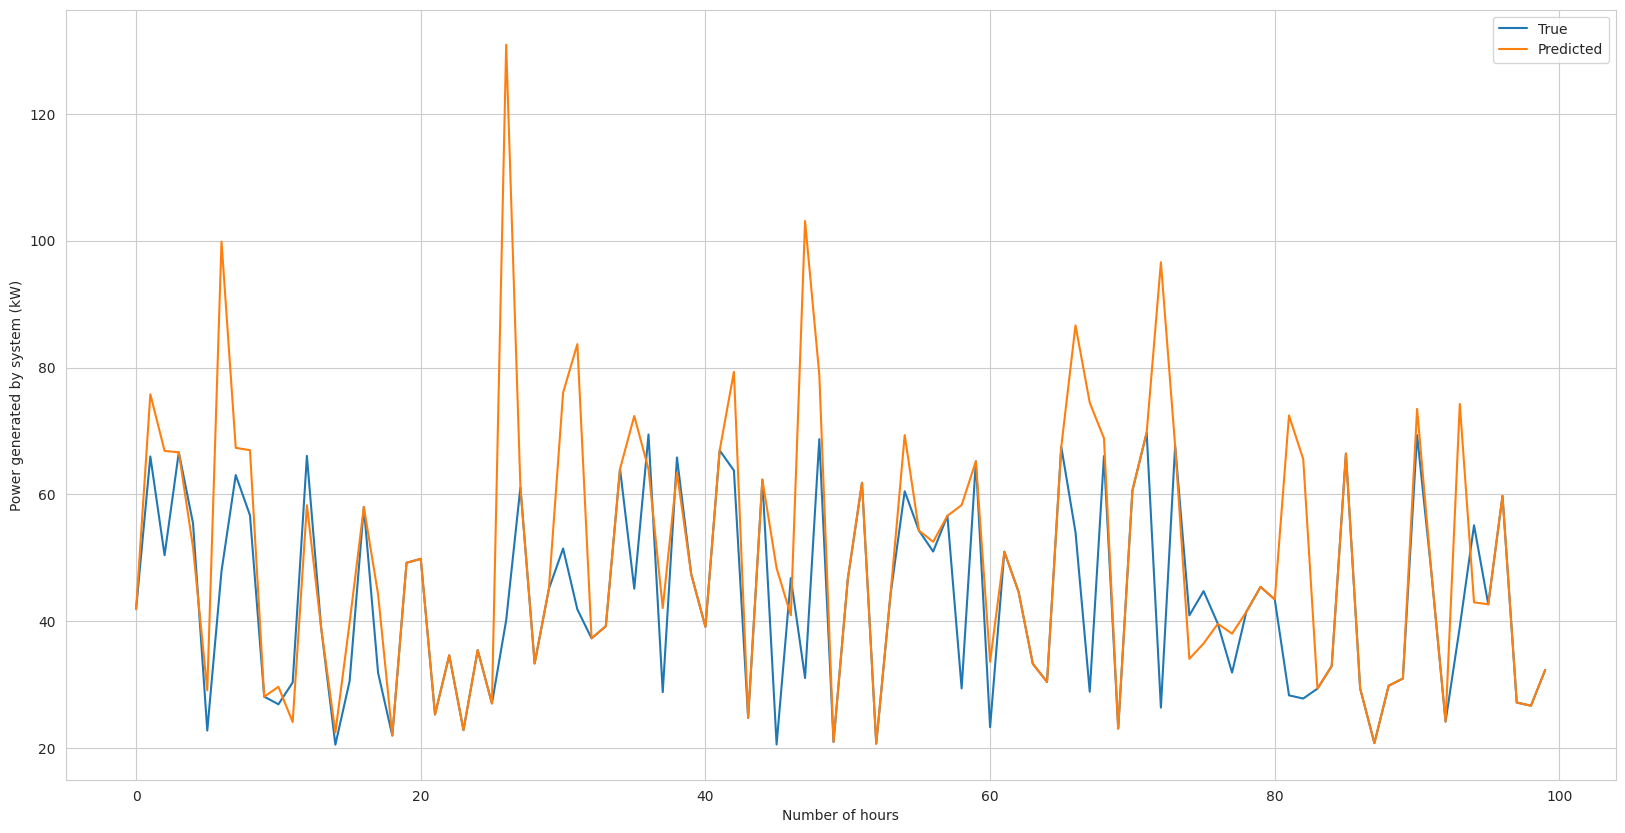

In [ ]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(y_actual[0:100], label="True")
plt.plot(y_predicted[0:100], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("Number of hours")
plt.ylabel("Power generated by system (kW)")
plt.show()

		Error Table
Mean Absolute Error      :  76.84808435054346
Mean Squared  Error      :  13491.934216006726
Root Mean Squared  Error :  116.1547855923583
Accuracy on Traing set   :  0.9989188264569573
Accuracy on Testing set  :  0.9914530377561533


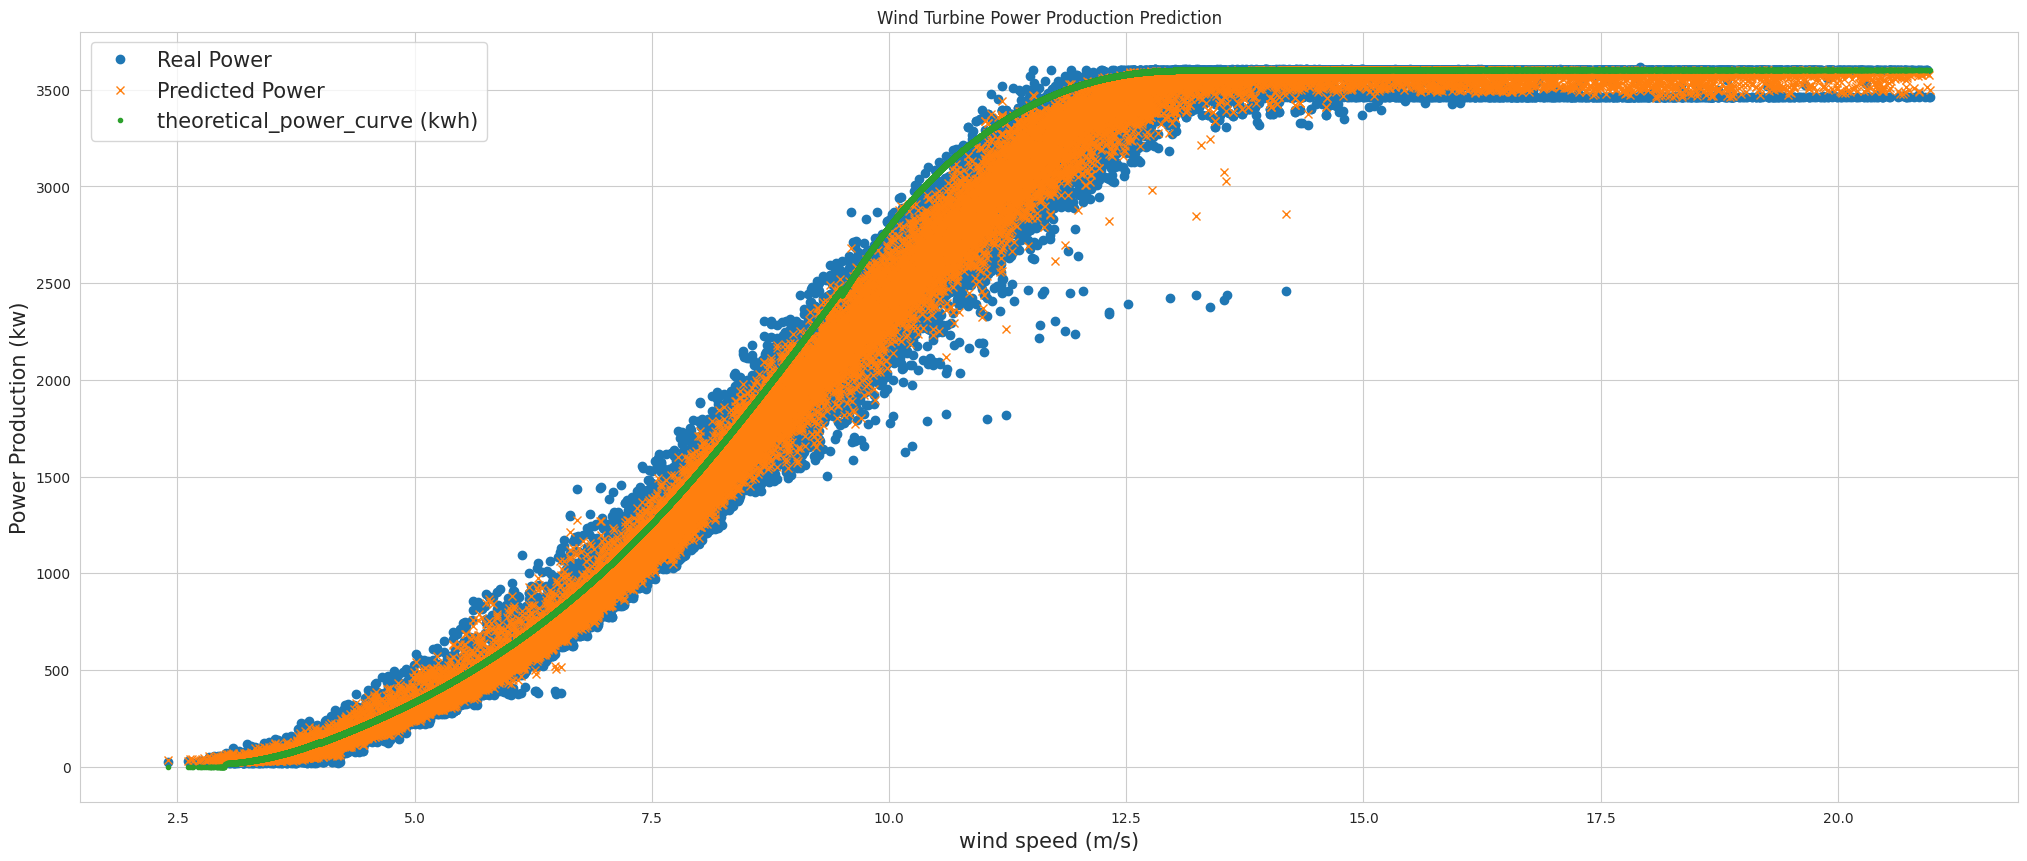

In [ ]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=350,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  76.74348955493771
Mean Squared  Error      :  13170.376888209872
Root Mean Squared  Error :  114.76226247425532
Accuracy on Traing set   :  0.9952305703357209
Accuracy on Testing set  :  0.9916567400790309


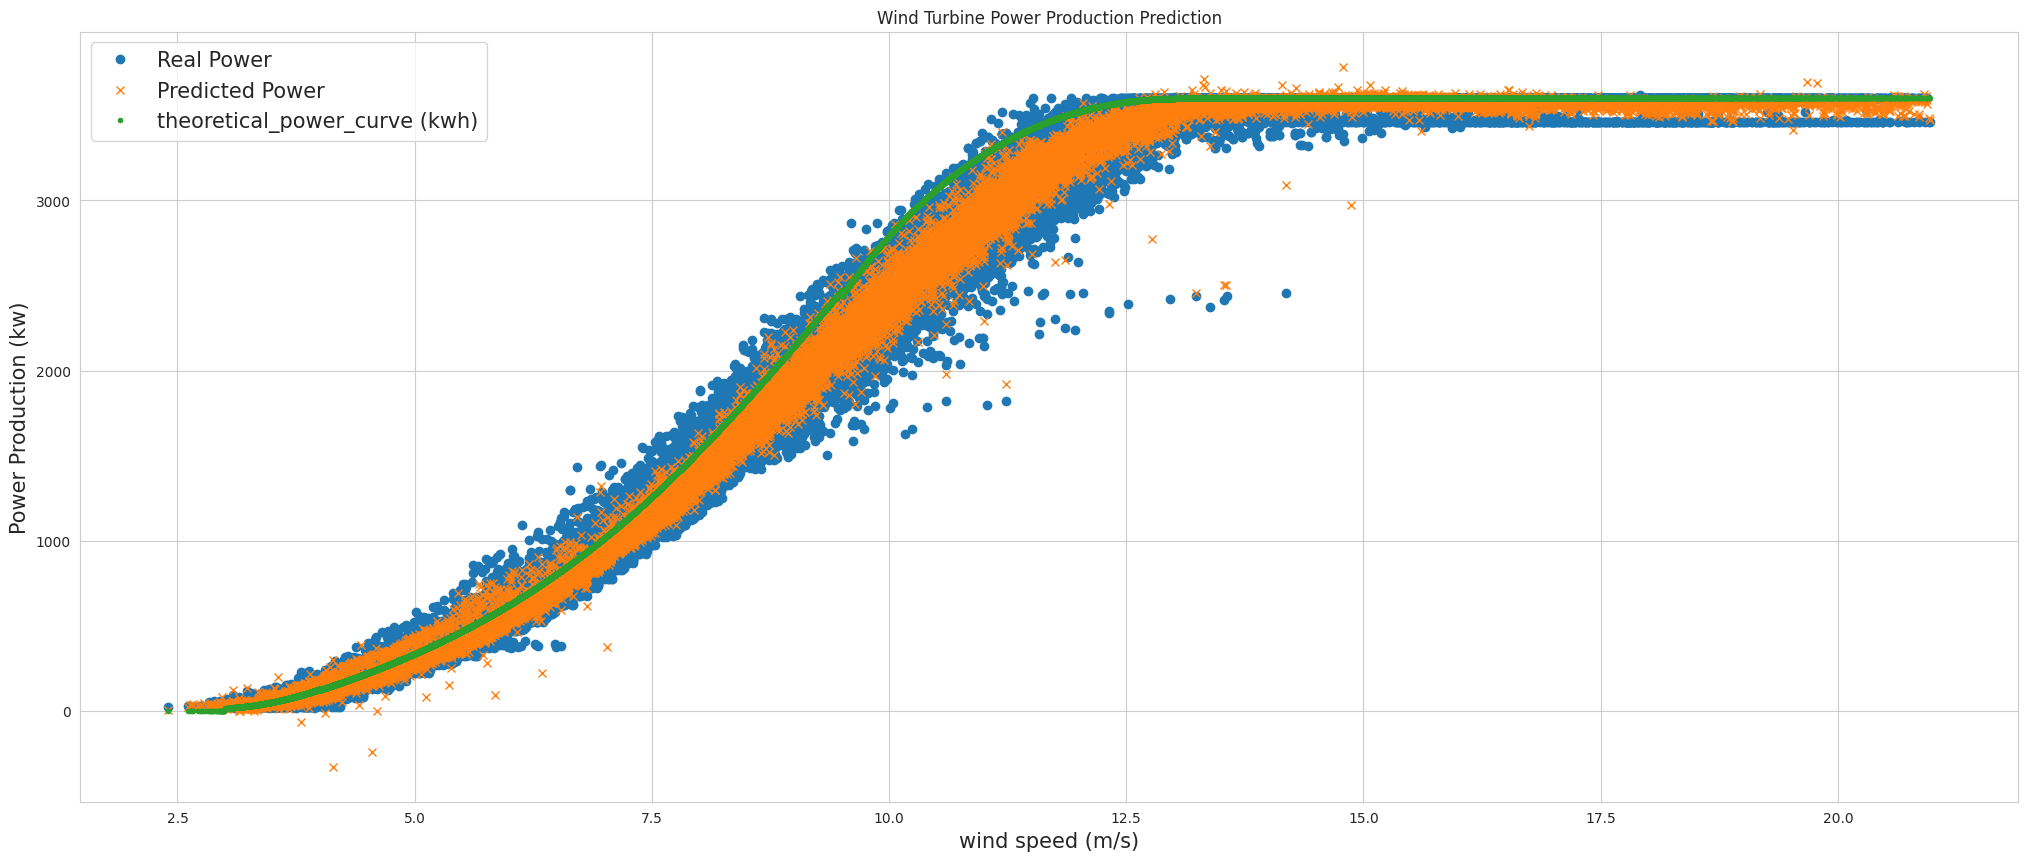

In [ ]:
y_predicted, y_actual = Models(GradientBoostingRegressor(random_state=21, n_estimators=2000))
Graph_prediction(y_actual, y_predicted)